In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
from scipy.signal import savgol_filter

# Additional microfluidic experiment

### Read in spreadsheets

In [3]:
Hg1 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='1_Hg',index_col=0)
Cu2 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='2_Cu',index_col=0)
As3 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='3_As',index_col=0)
Pb4 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='4_Pb',index_col=0)
Cd5 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='5_Cd',index_col=0)
Hg6 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='6_Hg',index_col=0)
Pb7 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='7_Pb',index_col=0)
As8 = pd.read_excel('./20251106_MGall.xlsx',sheet_name='8_As',index_col=0)


concat_df = pd.concat([Hg1,Cu2,As3,Pb4,Cd5,Hg6,Pb7,As8], ignore_index=True)


######## SUBTRACT BG ########

# Create an empty DataFrame to store background-corrected GFPs
concat_df_BG = pd.DataFrame(index=concat_df.index)

# Loop through all GFP columns that are not background columns
for col in concat_df.columns:
    if col.endswith('_GFP') and '_BG_' not in col:
        bg_col = col.replace('_GFP', '_BG_GFP')  # corresponding BG column name
        if bg_col in concat_df.columns:
            # Subtract background
            concat_df_BG[col] = concat_df[col] - concat_df[bg_col]
        else:
            print(f"Warning: Background column missing for {col}")

######## SUBTRACT PREIDX ########

idx_start = 12

# Initialize output DataFrame with same columns Cu df_GFP_corrected
concat_df_BG_preidex = pd.DataFrame(columns=concat_df_BG.columns)

for index, row in concat_df_BG.T.iterrows():
    # Calculate the mean of values before induction
    pre_mean = row[:idx_start].mean()

    # Subtract that mean from the entire row
    temp = pd.DataFrame(columns=concat_df_BG.T.columns)
    temp.loc[index] = row - pre_mean
    
    # Append to final dataframe
    concat_df_BG_preidex[index] = temp.T
    
# normalize by noise
concat_SNR = pd.DataFrame(columns=concat_df_BG_preidex.columns)

for i in concat_df_BG_preidex.columns:
    # calculate standard deviation of bCueline (frames 0–20) for each strain
    std = concat_df_BG_preidex.loc[0:20,i].std()
    
    # divide background-corrected signal by noise
    temp = concat_df_BG_preidex[i] / std
    
    # append to SNR dataframe
    concat_SNR[i] = temp

pos_map = {'1':'arsR','2':'cadC','3':'cusC','4':'merR','5':'zntA','6':'zraP'}

arsR = []
cadC = []
cusC = []
merR = []
zraP = []
zntA = []

for i in concat_SNR.columns:
    num = i.split('_')[0][1]
    if pos_map[num] == 'arsR':
        arsR.append(i)
    elif pos_map[num] == 'cadC':
        cadC.append(i)
    elif pos_map[num] == 'cusC':
        cusC.append(i)
    elif pos_map[num] == 'zraP':
        zraP.append(i)
    elif pos_map[num] == 'merR':
        merR.append(i)
    elif pos_map[num] == 'zntA':
        zntA.append(i)
        
concat_SNR

,C1_bp1_GFP,C1_bp2_GFP,E2_bp3_GFP,E2_bp4_GFP,C3_bp1_GFP,C3_bp2_GFP,C4_bp3_GFP,C4_bp4_GFP,C5_bp2_GFP,C5_bp3_GFP,B6_bp2_GFP,B6_bp3_GFP
0,-1.187725,-2.322887,-0.445668,-1.156403,-1.307839,-0.332022,-0.025709,-0.031154,0.902247,-0.798496,0.427098,-1.062413
1,-0.900542,-0.345428,-0.400673,0.888724,-1.228925,-0.291668,-0.022721,-0.040956,1.447294,-0.657511,0.664864,0.695426
2,-0.636644,-0.017304,-0.243194,0.664949,-0.652851,0.158949,0.055340,-0.033604,1.143030,-0.515547,0.532772,-0.701593
3,-0.598667,0.676193,0.175252,0.288216,-0.455565,0.043268,0.017990,0.001520,0.698529,-0.388023,-0.867405,-0.701593
4,-0.126867,0.471710,0.317434,0.681945,0.363170,0.080932,-0.061191,-0.030882,0.416593,-0.252356,0.981885,0.917468
...,...,...,...,...,...,...,...,...,...,...,...,...
584,11.080748,36.834760,2.077608,28.412953,962.982810,534.434065,66.436788,47.591126,7.206699,1.428036,28.919371,48.286591
585,10.868964,35.993052,1.688858,28.132527,963.700930,543.712753,66.021087,46.928114,7.062521,1.399211,29.711923,48.406864
586,10.565981,34.498268,2.095605,29.421353,964.969476,549.295031,65.826869,46.291785,6.993496,1.402295,30.986612,47.398420
587,10.135206,28.193384,2.033513,28.806683,960.909338,551.067908,64.590224,45.899151,7.392760,1.439725,30.002526,45.760854


### arsR

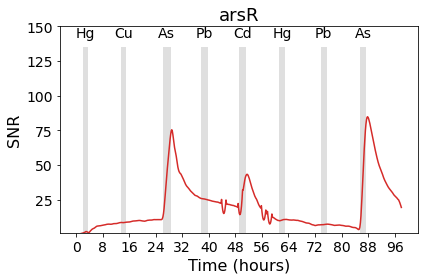

In [5]:
plt.plot(savgol_filter(concat_SNR[arsR].mean(axis=1),9,3), color='#D52B29')
ax = plt.gca()

ranges = [(12, 21), (82, 91), (157, 171), (225, 238),
          (294, 308), (367, 378), (442, 453), (514, 524)]
induc = ['Hg','Cu','As','Pb','Cd','Hg','Pb','As']

ymin, ymax = (1, 150)

# --- Draw shaded bars + labels ---
for idx, (x0, x1) in enumerate(ranges):
    rect = Rectangle((x0, ymin), x1 - x0, ymax - ymin - 15,
                     color='gray', alpha=0.25, linewidth=0, zorder=0)
    ax.add_patch(rect)

    x_center = (x0 + x1) / 2
    ax.text(
        x_center, ymax, induc[idx],
        ha='center', va='top', fontsize=14, color='black'
    )

ax.set_ylim(ymin, ymax)

# --- Convert x-axis to hours with ticks every 8 hours ---
num_points = concat_SNR[arsR].shape[0]
timepoints = np.arange(num_points)

hours = timepoints / 6.0   # convert index -> hours

# tick every 8 hours  → 8 hours * 6 points/hour = 48 points
tick_positions = np.arange(0, num_points, 48)
tick_labels = (tick_positions / 6).astype(int)  # integer hours

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel("Time (hours)", fontsize=16)
ax.set_ylabel("SNR", fontsize=16)
ax.set_title("arsR", fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()

### cadC

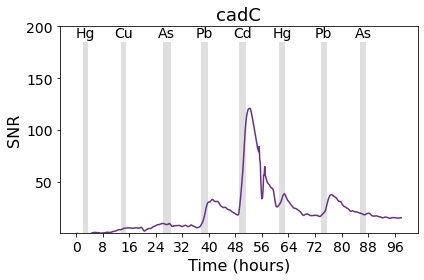

In [12]:
plt.plot(savgol_filter(concat_SNR[cadC].mean(axis=1),9,3), color='#67318D')
ax = plt.gca()

ranges = [(12, 21), (82, 91), (157, 171), (225, 238),
          (294, 308), (367, 378), (442, 453), (514, 524)]

induc = ['Hg','Cu','As','Pb','Cd','Hg','Pb','As']

ymin, ymax = (1, 200)

# --- Draw shaded bars + labels ---
for idx, (x0, x1) in enumerate(ranges):
    rect = Rectangle((x0, ymin), x1 - x0, ymax - ymin - 15,
                     color='gray', alpha=0.25, linewidth=0, zorder=0)
    ax.add_patch(rect)

    x_center = (x0 + x1) / 2
    ax.text(
        x_center, ymax, induc[idx],
        ha='center', va='top', fontsize=14, color='black'
    )

ax.set_ylim(ymin, ymax)

# --- Convert x-axis to hours with ticks every 8 hours ---
num_points = concat_SNR[cadC].shape[0]
timepoints = np.arange(num_points)

# convert index → hours
hours = timepoints / 6.0

# tick every 8 hours → 8 hr * 6 points/hr = 48 points
tick_positions = np.arange(0, num_points, 48)
tick_labels = (tick_positions / 6).astype(int)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel("Time (hours)", fontsize=16)
ax.set_ylabel("SNR", fontsize=16)
ax.set_title("cadC", fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()

### cusC

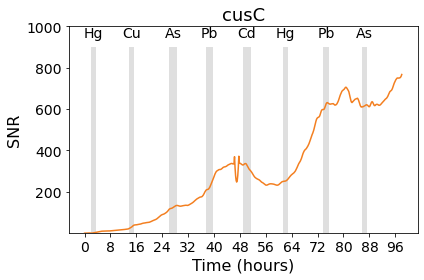

In [13]:
plt.plot(savgol_filter(concat_SNR[cusC].mean(axis=1),9,3), color='#F37F20')
ax = plt.gca()

ranges = [(12, 21), (82, 91), (157, 171), (225, 238),
          (294, 308), (367, 378), (442, 453), (514, 524)]

induc = ['Hg','Cu','As','Pb','Cd','Hg','Pb','As']

ymin, ymax = (1, 1000)

# --- Draw shaded bars + labels ---
for idx, (x0, x1) in enumerate(ranges):
    rect = Rectangle((x0, ymin), x1 - x0, ymax - ymin - 100,
                     color='gray', alpha=0.25, linewidth=0, zorder=0)
    ax.add_patch(rect)

    x_center = (x0 + x1) / 2
    ax.text(
        x_center, ymax, induc[idx],
        ha='center', va='top', fontsize=14, color='black'
    )

ax.set_ylim(ymin, ymax)

# --- Convert x-axis to hours with ticks every 8 hours ---
num_points = concat_SNR[cusC].shape[0]
timepoints = np.arange(num_points)

# each timepoint = 10 minutes → 6 points per hour
hours = timepoints / 6.0

# tick every 8 hours → 8 hr * 6 points/hr = 48 points
tick_positions = np.arange(0, num_points, 48)
tick_labels = (tick_positions / 6).astype(int)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel("Time (hours)", fontsize=16)
ax.set_ylabel("SNR", fontsize=16)
ax.set_title("cusC", fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()


### zraP

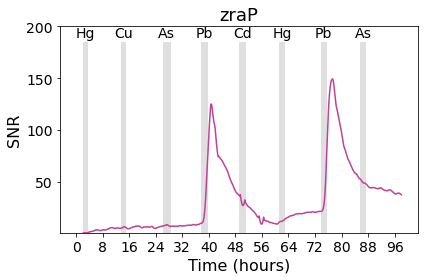

In [14]:
plt.plot(savgol_filter(concat_SNR[zraP].mean(axis=1),9,3), color='#C34097')
ax = plt.gca()

# list of (start_index, end_index) slices to highlight
ranges = [(12, 21), (82, 91), (157, 171), (225, 238),
          (294, 308), (367, 378), (442, 453), (514, 524)]

induc = ['Hg','Cu','As','Pb','Cd','Hg','Pb','As']

ymin, ymax = (1, 200)

for idx, (x0, x1) in enumerate(ranges):
    # Draw gray bar
    rect = Rectangle((x0, ymin), x1 - x0, ymax - ymin - 15,
                     color='gray', alpha=0.25, linewidth=0, zorder=0)
    ax.add_patch(rect)

    # Label position (center of bar)
    x_center = (x0 + x1) / 2
    ax.text(
        x_center, ymax, induc[idx],
        ha='center', va='top', fontsize=14, color='black'
    )

ax.set_ylim(ymin, ymax)

# --- Convert x-axis to hours with ticks every 8 hours ---
num_points = concat_SNR[zraP].shape[0]
timepoints = np.arange(num_points)

# each time point = 10 mins → 6 points per hour
hours = timepoints / 6.0

# tick every 8 hours → 8 hr * 6 = 48 points
tick_positions = np.arange(0, num_points, 48)
tick_labels = (tick_positions / 6).astype(int)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('SNR', fontsize=16)
ax.set_title('zraP', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()


### merR

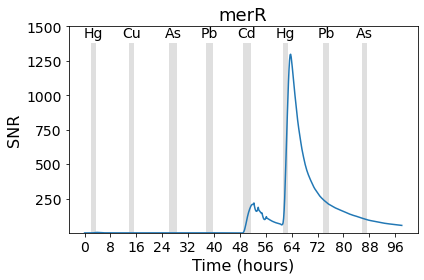

In [15]:
plt.plot(savgol_filter(concat_SNR[merR].mean(axis=1),9,3), color='#2278B5')
ax = plt.gca()

# list of (start_index, end_index) slices to highlight
ranges = [(12, 21), (82, 91), (157, 171), (225, 238),
          (294, 308), (367, 378), (442, 453), (514, 524)]

induc = ['Hg','Cu','As','Pb','Cd','Hg','Pb','As']

ymin, ymax = (1, 1500)

for idx, (x0, x1) in enumerate(ranges):
    # Draw gray bar
    rect = Rectangle((x0, ymin), x1 - x0, ymax - ymin - 120,
                     color='gray', alpha=0.25, linewidth=0, zorder=0)
    ax.add_patch(rect)

    # Label position (center of bar)
    x_center = (x0 + x1) / 2
    ax.text(
        x_center, ymax, induc[idx],
        ha='center', va='top', fontsize=14, color='black'
    )

ax.set_ylim(ymin, ymax)

# --- Convert x-axis to hours with ticks every 8 hours ---
num_points = concat_SNR[merR].shape[0]
timepoints = np.arange(num_points)

# convert index -> hours (10 min steps → 6 points per hour)
hours = timepoints / 6.0

# tick every 8 hours → 8 hr * 6 = 48 points
tick_positions = np.arange(0, num_points, 48)
tick_labels = (tick_positions / 6).astype(int)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('SNR', fontsize=16)
ax.set_title('merR', fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()

### zntA

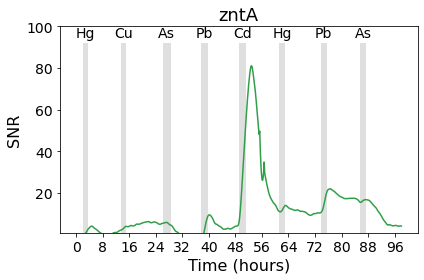

In [16]:
plt.plot(savgol_filter(concat_SNR[zntA].mean(axis=1),9,3), color='#2F9F48')
ax = plt.gca()

# list of (start_index, end_index) slices to highlight
ranges = [(12, 21), (82, 91), (157, 171), (225, 238),
          (294, 308), (367, 378), (442, 453), (514, 524)]

induc = ['Hg','Cu','As','Pb','Cd','Hg','Pb','As']

ymin, ymax = (1, 100)

for idx, (x0, x1) in enumerate(ranges):
    # Draw gray bar
    rect = Rectangle((x0, ymin), x1 - x0, ymax - ymin - 8,
                     color='gray', alpha=0.25, linewidth=0, zorder=0)
    ax.add_patch(rect)

    # Label text
    x_center = (x0 + x1) / 2
    ax.text(
        x_center, ymax, induc[idx],
        ha='center', va='top', fontsize=14, color='black'
    )

ax.set_ylim(ymin, ymax)

# --- Convert x-axis to hours with ticks every 8 hours ---
num_points = concat_SNR[zntA].shape[0]
timepoints = np.arange(num_points)

# convert index → hours (10 min = 1/6 hr)
hours = timepoints / 6.0

# tick every 8 hours → 8 hr * 6 = 48 points
tick_positions = np.arange(0, num_points, 48)
tick_labels = (tick_positions / 6).astype(int)

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel("Time (hours)", fontsize=16)
ax.set_ylabel("SNR", fontsize=16)
ax.set_title("zntA", fontsize=18)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
